In [24]:
import numpy as np

## Non Linear Least Square

In [2]:
import lmfit

In [3]:
?lmfit

Type:        module
String form: <module 'lmfit' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lmfit/__init__.py'>
File:        /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lmfit/__init__.py
Docstring:  
LMFIT: Non-Linear Least-Squares Minimization and Curve-Fitting for Python.

Lmfit provides a high-level interface to non-linear optimization and
curve-fitting problems for Python. It builds on the Levenberg-Marquardt
algorithm of `scipy.optimize.leastsq`, but also supports most of the other
optimization methods present in `scipy.optimize`. It has a number of
useful enhancements, including:

  * Using Parameter objects instead of plain floats as variables. A
    Parameter has a value that can be varied in the fit, fixed, have
    upper and/or lower bounds. It can even have a value that is
    constrained by an algebraic expression of other Parameter values.

  * Ease of changing fitting algorithms. Once a fitting

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel("data/data_growth.xlsx")

In [20]:
import matplotlib.pyplot as plt

In [25]:
from numpy import linspace, random
from scipy.optimize import leastsq

# generate synthetic data with noise
x = linspace(0, 100)
noise = random.normal(size=x.size, scale=0.2)
data = 7.5 * np.sin(x*0.22 + 2.5) * np.exp(-x*x*0.01) + noise

uncertainty = abs(0.16 + random.normal(size=x.size, scale=0.05))

variables = [10.0, 0.2, 3.0, 0.007]
# out = leastsq(residual, variables, args=(x, data, uncertainty))

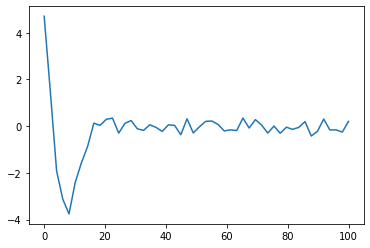

In [26]:
plt.plot(x, data)

In [27]:
df

,Temp,DO,NH4,Unnamed: 3,NO2,ABW,DOC
0,M,M,M,A,M,NaN,NaN
1,29,7.36,0.6,0,NaN,NaN,1.0
2,29,8.81,0,0,0,NaN,2.0
3,29,7.74,0,0,NaN,NaN,3.0
4,28,8.4,0,0,0,NaN,4.0
...,...,...,...,...,...,...,...
1692,28.5,5.46,3.3,3,4.5,15.460,69.0
1693,27.9,6.05,2.9,2.6,4.5,15.604,70.0
1694,28.3,5.76,2.7,2.9,4.5,15.748,71.0
1695,28.6,5.88,2.7,3.3,4.3,15.892,72.0


In [22]:
from scipy import optimize
# let's define the function form

x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

def func(x, a, b):
    y = a*np.exp(b*x)
    return y

alpha, beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
# beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')
# print(f'beta={beta}')


NameError: name 'np' is not defined

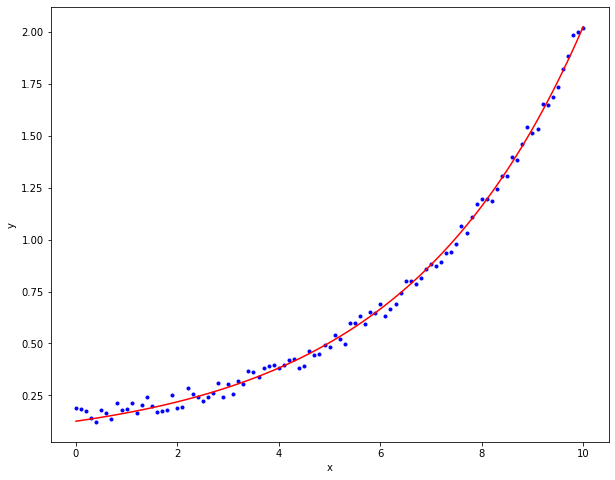

In [53]:
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [58]:
def func1(x, x1, x2, x3):
    y = x*x3*np.exp(2*x1 + 2*x2)
    return y

### Notes

Dalam penggunaan fungsi curve_fit diperhatikan bahwa pada `func1` parameter pertama merupakan parameter yang telah diketehui nilainya. Berdasarkan dokucmentasi di scipy disebutkan bahwa paremater x dapat berukuran $k \times M$

In [57]:
a, b = optimize.curve_fit(func1, xdata = x, ydata = y)[0]
print(f'alpha={a}, beta={b}')

alpha=-64426.76790491006, beta=64425.804075321954


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [59]:
optimize.curve_fit(func1, xdata = x, ydata = y)[0]

array([-0.50702125, -0.12917953,  0.51929216])

In [15]:
import seaborn
def func1(x, a, b, c, d = 10):
    y = d+ np.exp(a*x[0] + b*x[1] + c* x[2])
    return y

iris = seaborn.load_dataset("iris")

xData = iris.drop('species', axis=1).values[:, :3].T
yData = iris.drop('species', axis=1).values[:, 3].T

curve_fit(func1, xdata = xData, ydata = yData)[0]

array([-0.11874399,  0.08228048,  0.27988389, -0.78017336])

### Integral

In [35]:
from scipy.integrate import quad

In [36]:
def integral(x):
    return x**2 + 1

In [43]:
def func1(x, a, b, c, d = 10):
    y = d+ np.exp(a*quad(integral, 0, 1)[0] * x[0]+ b*x[1] + c* x[2])
    return y 

In [44]:
optimize.curve_fit(func1, xdata = xData, ydata = yData,)[0]

array([-0.0890559 ,  0.08228269,  0.27988046, -0.78019041])

In [42]:
quad(integral, 0, 5)[0]

46.66666666666667

In [1]:
from lib.uem.metrices import Compute
from lib.uem.biomass import Biomassa
from lib.helpers import price_function, source_data, score_csc_compute
from lib.uem.feeding_rate import feeding_rate

import numpy as np


f_uia, f_o2, f_temp, temperature = source_data(
    path = "data/growth_full.csv",
    temp_suitable_min = 25,
    temp_suitable_max = 33,
    temp_optimal_min = 28,
    temp_optimal_max = 32,
    do_suitable_min = 4,
    do_suitable_max = 10,
    do_optimal_min = 6,
    do_optimal_max = 9,
    ua_suitable_min = 0.00,
    ua_suitable_max = 0.16,
    ua_optimal_min = 0.00,
    ua_optimal_max = 0.06,
)


csc_suitable_min = 0.00
csc_suitable_max = 5
csc_optimal_min = 0.00
csc_optimal_max = 3


In [5]:
T = 120

def funcWt(data, alpha):
    f_uia, f_o2, f_temp, temperature = source_data(
        path = "data/growth_full.csv", # path
        temp_suitable_min = 25,
        temp_suitable_max = 33,
        temp_optimal_min = 28,
        temp_optimal_max = 32,
        do_suitable_min = 4,
        do_suitable_max = 10,
        do_optimal_min = 6,
        do_optimal_max = 9,
        ua_suitable_min = 0.00,
        ua_suitable_max = 0.16,
        ua_optimal_min = 0.00,
        ua_optimal_max = 0.06,
    )


    csc_suitable_min = 0.00
    csc_suitable_max = 5
    csc_optimal_min = 0.00
    csc_optimal_max = 3

    sr = 0.92

    m = -np.log(sr)/data

    weight = []
    biomassa = []

    cum_integral = 0
    for t in data:
        for i in range(int(t)+1):
            if i == 0:
                score_csc = score_csc_compute(0/1000, 0.01, csc_suitable_min, csc_suitable_max, csc_optimal_max)
                feedRate = feeding_rate(0, float(temperature[temperature["DOC"]==i-1]["Temp"]), 0)
                obj = Biomassa(0, i, 40, 0.05, alpha, 100, sr, m, [0.1, 0.1, 0.1], [60, 70, 80], f_uia, f_o2, f_temp, score_csc, feedRate, cum_integral, final_doc=120)
                wt = obj.wt()
                biomass = obj.biomassa()
                
            else:
                score_csc = score_csc_compute(biomassa[-1]/1000, 1000, csc_suitable_min, csc_suitable_max, csc_optimal_max)
                feedRate = feeding_rate(weight[-1], float(temperature[temperature["DOC"]==i-1]["Suhu_s"]), biomassa[-1]/1000)
                obj = Biomassa(i-1, i, 40, 0.05, alpha, 100, sr, m, [0.1, 0.1, 0.1], [60, 70, 80], f_uia, f_o2, f_temp, score_csc, feedRate, cum_integral, 120)
                wt = obj.wt()
                biomass = obj.biomassa()

            weight.append(wt)
            biomassa.append(biomass)
    
    return weight[-1] 

In [6]:
from scipy.optimize import curve_fit

In [16]:
df = pd.read_csv("data/growth_full.csv", sep=";")
xData = df["DOC"].tolist()
yData = df["ABW"].tolist()

# curve_fit(funcWt, xData, yData)

In [35]:
from scipy.integrate import quad

def func2(data, alpha, wn=45, w0=0.05):
    return (wn**(1/3) - (wn**(1/3) - w0**(1/3))*np.exp(-alpha*data))**3

In [41]:
curve_fit(func2, xData, yData, maxfev=10000)[0]

/var/folders/pg/3sr7t46900g4xmjmrwp347t40000gn/T/ipykernel_15093/3163053072.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return (wn**(1/3) - (wn**(1/3) - w0**(1/3))*np.exp(-alpha*data))**3


array([4.60601148e-01, 3.64634657e+00, 3.01855117e-19])

In [46]:
def func3(x, y):
    return x*y + 20

In [47]:
curve_fit(func3, xData, yData, maxfev=10000)[0]

array([-0.10474206])

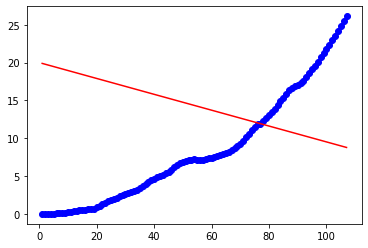

In [55]:
import matplotlib.pyplot as plt
plt.scatter(xData, yData, color='b')
plt.plot(xData, -0.10474206*np.array(xData)+20, color='r')

In [ ]:
T = 120

def funcWt(data, alpha):
    f_uia, f_o2, f_temp, temperature = source_data(
        path = "data/growth_full.csv", # path
        temp_suitable_min = 25,
        temp_suitable_max = 33,
        temp_optimal_min = 28,
        temp_optimal_max = 32,
        do_suitable_min = 4,
        do_suitable_max = 10,
        do_optimal_min = 6,
        do_optimal_max = 9,
        ua_suitable_min = 0.00,
        ua_suitable_max = 0.16,
        ua_optimal_min = 0.00,
        ua_optimal_max = 0.06,
    )


    csc_suitable_min = 0.00
    csc_suitable_max = 5
    csc_optimal_min = 0.00
    csc_optimal_max = 3

    sr = 0.92

    m = -np.log(sr)/data

    weight = []
    biomassa = []

    cum_integral = 0
    for t in data:
        for i in range(int(t)+1):
            if i == 0:
                score_csc = score_csc_compute(0/1000, 0.01, csc_suitable_min, csc_suitable_max, csc_optimal_max)
                feedRate = feeding_rate(0, float(temperature[temperature["DOC"]==i-1]["Temp"]), 0)
                obj = Biomassa(0, i, 40, 0.05, alpha, 100, sr, m, [0.1, 0.1, 0.1], [60, 70, 80], f_uia, f_o2, f_temp, score_csc, feedRate, cum_integral, final_doc=120)
                wt = obj.wt()
                biomass = obj.biomassa()
                
            else:
                score_csc = score_csc_compute(biomassa[-1]/1000, 1000, csc_suitable_min, csc_suitable_max, csc_optimal_max)
                feedRate = feeding_rate(weight[-1], float(temperature[temperature["DOC"]==i-1]["Suhu_s"]), biomassa[-1]/1000)
                obj = Biomassa(i-1, i, 40, 0.05, alpha, 100, sr, m, [0.1, 0.1, 0.1], [60, 70, 80], f_uia, f_o2, f_temp, score_csc, feedRate, cum_integral, 120)
                wt = obj.wt()
                biomass = obj.biomassa()

            weight.append(wt)
            biomassa.append(biomass)
    
    return weight[-1] 

In [58]:
f_uia(1)

array(0.)

In [61]:
score_csc = score_csc_compute(0/1000, 0.01, csc_suitable_min, csc_suitable_max, csc_optimal_max)
feedRate = feeding_rate(0, float(temperature[temperature["DOC"]==1]["Temp"]), 0)

In [62]:
from lib.uem.integrate_fr import Fungsi



In [69]:
from scipy.integrate import quad


class Fungsi:
    def __init__(self, a, b, f_uia, f_o2, f_temp, score_csc, feeding_rate):

        self.a = a
        self.b = b

        self.f_uia = f_uia
        self.f_o2 = f_o2
        self.f_temp = f_temp

        self.score_csc = score_csc
        self.feeding_rate = feeding_rate

    def _integrate_function(self, t):
        temp = self.f_temp(t)
        o2 = self.f_o2(t)
        uia = self.f_uia(t)

        if (temp == 0) or (o2 == 0) or (uia == 0):
            return 0
        else:
            return temp + o2 + uia + self.score_csc + self.feeding_rate


    def get_integral2(self):
        if type(self.b) == list:
            print("test")
            ret = [quad(self._integrate_function, self.a, i, limit=1500) for i in self.b]
            return ret
        else:
            return quad(self._integrate_function, self.a, self.b, limit=1500)    

    def get_integral(self):
        return quad(self._integrate_function, self.a, self.b, limit=1500)


In [65]:
def func4(t, alpha):
    obj = Fungsi(0, t, f_uia, f_o2, f_temp, score_csc, feedRate)
    return alpha * obj.get_integral2()

In [74]:
from scipy.integrate import quad_vec
curve_fit(lambda x, c: c*quad_vec(x), [1,2,3], [1,5,6])

TypeError: quad_vec() missing 2 required positional arguments: 'a' and 'b'